Initial analysis of data for NIST multi-pin layout augmented with additional (randomly configured) pins.

In [14]:
""" Gaussian process fits for the metal plate test layout consisting of the 16 NIST pins
plus some additional pins whose locations, diameters and heights were chosen randomly.
"""

%matplotlib notebook
%load_ext autoreload
%autoreload 2

__author__ = "mjp"
__version__ = "0.0.1"
__status__ = "development"

__copyright__ = "Copyright 2016, JHU/APL"
__license__ = "Apache, Version 2.0"

import os, csv

import numpy as np
import pylab as plt
from mpl_toolkits.mplot3d import axes3d, art3d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
# Some helper functions for loading and visualizing data

def load_data(fn):
    """Loads data set from CSV file.
       fn : The .csv file to load.  Format is assumed to be:
            xNominal, xMeasured, yNominal, yMeasured, dNominal, dMeasured, zNominal, zMeasured
            
            where x, y, d, z are pin x-position, y-position, diameter and height.
    """
    Z = []

    cast = lambda row: [row[0].strip(),] + [float(x) for x in row[1:]]
    
    with open(fn, 'rU') as f:
        reader = csv.reader(f, delimiter=',')
        for rowIdx, row in enumerate(reader):
            if rowIdx == 0: continue # skip header
                
            pinId, xNom, xMeas, yNom, yMeas, dNom, dMeas, zNom, zMeas = cast(row)
            Z.append((xNom, xMeas, yNom, yMeas, dNom, dMeas, zNom, zMeas))

    return np.array(Z)


def cart2polar(x, y):
    "Cartesian to polar coordinates."
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    return r[:,np.newaxis], theta[:,np.newaxis]


def stem3c(ax, x, y, z):
    "Colored 3d stem plot (similar to matlab's stem3())"
    ax.scatter(x, y, z, 'k')
    
    for ii in range(len(x)):
        color = 'green' if z[ii] >= 0 else 'blue'

        line = art3d.Line3D((x[ii], x[ii]),
                            (y[ii], y[ii]),
                            (0, z[ii]),
                            color=color)
        ax.add_line(line)
            

In [11]:
inDir = os.path.join('..', 'data')
inFile = os.path.join(inDir, 'NIST_randomized_metal_no1.csv')
Z = load_data(inFile)

# extract data of interest
# The measured variables wear hats.
x = Z[:,0];  y = Z[:,2]
xHat = Z[:,1];  yHat = Z[:,3]
d = Z[:,4];  dHat = Z[:,5];
z = Z[:,6];  zHat = Z[:,7];

r, theta = cart2polar(x,y)
rHat, thetaHat = cart2polar(xHat, yHat)

<IPython.core.display.Javascript object>


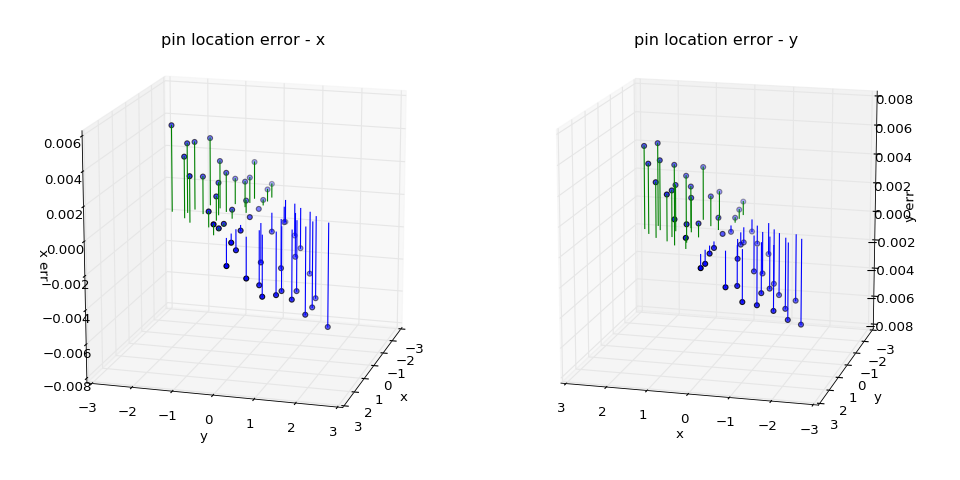

In [22]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')
stem3c(ax, x, y, xHat-x)
ax.view_init(elev=16, azim=16)
ax.set_zlabel('x err')
plt.xlabel('x'); plt.ylabel('y'); 
plt.title('pin location error - x coordinate')
    
ax = fig.add_subplot(122, projection='3d')
stem3c(ax, x, y, yHat-y)
ax.view_init(elev=15, azim=105)
ax.set_zlabel('y err')
plt.xlabel('x'); plt.ylabel('y'); 
plt.title('pin location error - y coordinate')
plt.tight_layout()

<IPython.core.display.Javascript object>


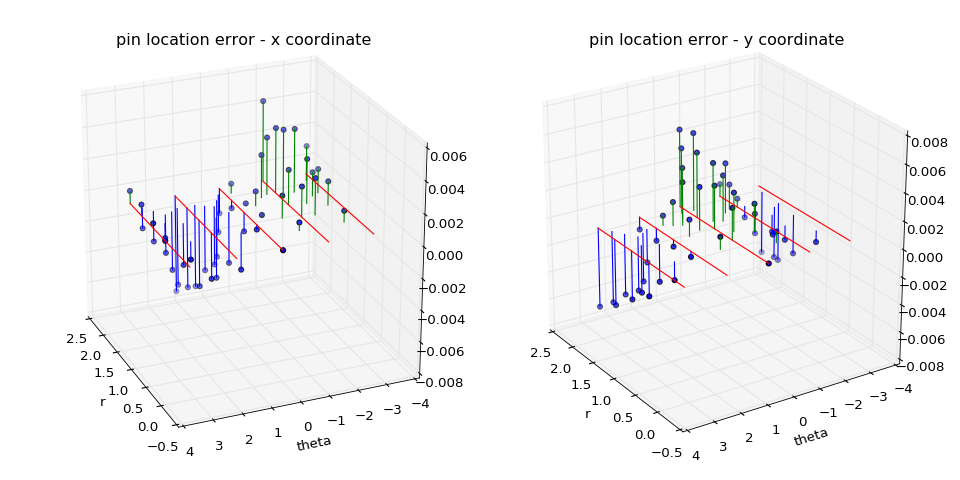

In [25]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')
stem3c(ax, r, theta, xHat-x)
for tLine in [-np.pi, -np.pi/2., 0, np.pi/2., np.pi]:
    line = art3d.Line3D((np.min(r), np.max(r)),
                        (tLine, tLine),
                        (0,0),
                        color='red')
    ax.add_line(line)
ax.view_init(elev=25, azim=157)
plt.xlabel('r'); plt.ylabel('theta'); 
plt.title('pin location error - x coordinate')

     
ax = fig.add_subplot(122, projection='3d')
stem3c(ax, r, theta, yHat-y)
for tLine in [-np.pi, -np.pi/2., 0, np.pi/2., np.pi]:
    line = art3d.Line3D((np.min(r), np.max(r)),
                        (tLine, tLine),
                        (0,0),
                        color='red')
    ax.add_line(line)
ax.view_init(elev=25, azim=147)
plt.xlabel('r'); plt.ylabel('theta'); 
plt.title('pin location error - y coordinate')
plt.tight_layout()